In [102]:
import numpy as np
from matplotlib import pyplot as plt

### Equations:

\begin{equation} \tag{1}
m_i^{(t)} = \frac{a_i^{(t)}}{a_i^{(t)}+b_t^{(t)}} m_{i+1}^{(t-1)} + \frac{b_i^{(t)}}{a_i^{(t)}+b_t^{(t)}} m_{i-1}^{(t-1)} - a_i^{(t)}
\end{equation}

\begin{equation*} \tag{2}
n_i^{(t)} = \frac{a_i^{(t)}}{a_i^{(t)}+b_t^{(t)}} n_{i+1}^{(t-1)} + \frac{b_i^{(t)}}{a_i^{(t)}+b_t^{(t)}} n_{i-1}^{(t-1)} - b_i^{(t)}
\end{equation*}

\begin{equation*} \tag{3}
(a_i^{(t)} + b_i^{(t)})^2 = b_i^{(t)} (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

\begin{equation*} \tag{4}
(a_i^{(t)} + b_i^{(t)})^2 = a_i^{(t)} (n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)})
\end{equation*}

### Solving:

Strategy: at each time $t$, suppose we have $m_{i+1}^{(t-1)}$, $m_{i-1}^{(t-1)}$ and $n_{i+1}^{(t-1)}$, $n_{i-1}^{(t-1)}$. <br>
Then, first solve for $a_i^{(t)}$ and $b_i^{(t)}$ using eq (3) and eq (4). <br>
Plug into to eq (1) and eq (2) to solve for $m_{i}^{(t)}$ and $n_{i}^{(t)}$.

Equating (3) and (4):

\begin{equation*}
a_i^{(t)} (n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)}) = b_i^{(t)} (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

\begin{equation*}
a_i^{(t)} = \frac{(m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})}{(n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)})} b_i^{(t)}
\end{equation*}

\begin{equation*}
a_i^{(t)} = \frac{\Delta m}{\Delta n} b_i^{(t)}
\end{equation*}

where $\Delta m$ and $\Delta n$ are calculable constants obtained from previous timestep: 

\begin{equation*}
\Delta m = (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

\begin{equation*}
\Delta n = (n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)})
\end{equation*}

Expanding (3):

\begin{equation*}
(a_i^{(t)})^2 + 2 a_i^{(t)} b_i^{(t)} + (b_i^{(t)})^2 = b_i^{(t)} (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

Substituting expression for $a_i^{(t)}$ in terms of $b_i^{(t)}$:

\begin{equation*}
(\frac{\Delta m}{\Delta n} b_i^{(t)})^2 + 2 (\frac{\Delta m}{\Delta n} b_i^{(t)}) b_i^{(t)} + (b_i^{(t)})^2 = b_i^{(t)} \Delta m
\end{equation*}

\begin{equation*}
(b_i^{(t)})^2 \left( \left(\frac{\Delta m}{\Delta n} \right)^2 + 2\frac{\Delta m}{\Delta n} + 1 \right) = b_i^{(t)} \Delta m
\end{equation*}

if $b_i^{(t)} \neq 0$:

\begin{equation*}
b_i^{(t)} = \frac{\Delta m}{\left( \left(\frac{\Delta m}{\Delta n} \right)^2 + 2\frac{\Delta m}{\Delta n} + 1 \right)}
\end{equation*}

\begin{equation*}
= \frac{\Delta m}{\left( \frac{\Delta m}{\Delta n} + 1 \right)^2}
\end{equation*}

which means:

\begin{equation*}
a_i^{(t)} = \frac{\Delta m}{\Delta n} \frac{\Delta m}{\left( \frac{\Delta m}{\Delta n} + 1 \right)^2}
\end{equation*}

Finally, we can plugin values of $a_i^{(t)}$ and $b_i^{(t)}$ into eq (1) and eq (2) to obtain $m_i^{(t)}$ and $n_i^{(t)}$.

### Initialization:

#### Contants:
Left end = $-k$ <br>
Right end = $l$ <br>
Payoff factor = $\lambda$ <br>

#### Positional Boundary Values:
$n_{-k}^{(t)} = 1$ -------- $n_{l}^{(t)} = 0$ <br>
$m_{-k}^{(t)} = 0$ -------- $m_{l}^{(t)} = \lambda$ <br>
for all time step $t$ <br>

#### Time Boundary Values:
$m_i^{(0)} = \frac{\lambda}{k+l}(i+k)$ <br>
$n_i^{(0)} = \frac{l-i}{k+l}$ <br>
for all positions $-k \leq i \leq l$ <br>

In [135]:
k = 6      # left endpoint: -k
l = 6      # right endpoint: l
L = k+l+1    # total length: k+l
T = 100    # Time steps

# Note: position index i will be shifted
# before: left end = -k, middle = 0, right end = l
# now: left end = 0, middle = k, right end = k + l (= L)

m_lambda = 100000
n_lambda = m_lambda


# initialize the m,n values are time t=0, 
# then iterate starting from t=1, use m(t-1), n(t-1) to compute a(t) and b(t) 
# then use a(t) and b(t) to compute m(t) and n(t)

# Each matrix: vertical axis (rows): time step, horizontal axis (colunmns): position
# Therefore, m[t][i] access m value at time t, position index i
a = np.zeros(T*L).reshape((T, L))
b = np.zeros(T*L).reshape((T, L))
m = np.zeros(T*L).reshape((T, L))
n = np.zeros(T*L).reshape((T, L))

# Initialize positional boundary values
for t in range(a.shape[0]):
    n[t][0] = n_lambda
    m[t][0] = 0
    n[t][L-1] = 0
    m[t][L-1] = m_lambda
    
# Initialize time boundary values
for i in range(L):
    m[0][i] = (m_lambda / (L-1) ) * i
    n[0][i] = (n_lambda / (L-1)) * ((L-1) - i)

In [136]:
m[0]

array([     0.        ,   8333.33333333,  16666.66666667,  25000.        ,
        33333.33333333,  41666.66666667,  50000.        ,  58333.33333333,
        66666.66666667,  75000.        ,  83333.33333333,  91666.66666667,
       100000.        ])

In [137]:
m[1]

array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0., 100000.])

In [138]:
n[0]

array([100000.        ,  91666.66666667,  83333.33333333,  75000.        ,
        66666.66666667,  58333.33333333,  50000.        ,  41666.66666667,
        33333.33333333,  25000.        ,  16666.66666667,   8333.33333333,
            0.        ])

In [139]:
n[1]

array([100000.,      0.,      0.,      0.,      0.,      0.,      0.,
            0.,      0.,      0.,      0.,      0.,      0.])

In [140]:
# Recursive solving algorithm

DEBUG = True

for t in range(1, T):
    if DEBUG:
        print(f"-------------- step {t} --------------")
    for i in range(1, L-1):
        delta_m = m[t-1][i+1] - m[t-1][i-1]
        delta_n = n[t-1][i-1] - n[t-1][i+1]
        # Compute a,b using previous m,n
        b[t][i] = delta_m / (((delta_m / delta_n) + 1)**2)
        a[t][i] = (delta_m / delta_n) * b[t][i]
        # Compute current m,n using current a,b
        m[t][i] = (a[t][i]/(a[t][i] + b[t][i]))*m[t-1][i+1] + (b[t][i]/(a[t][i] + b[t][i]))*m[t-1][i-1] - a[t][i]
        n[t][i] = (a[t][i]/(a[t][i] + b[t][i]))*n[t-1][i+1] + (b[t][i]/(a[t][i] + b[t][i]))*n[t-1][i-1] - b[t][i]
        
        if DEBUG:
            print("Previous m, n:")
            print(m[t-1][i+1], m[t-1][i-1], n[t-1][i+1], n[t-1][i-1])
            print("Delta m, Delta n:")
            print(delta_m, delta_n)
            print("Current a, b:")
            print(a[t][i], b[t][i])
            print("Current m, n:")
            print(m[t][i], n[t][i])

-------------- step 1 --------------
Previous m, n:
16666.666666666668 0.0 83333.33333333334 100000.0
Delta m, Delta n:
16666.666666666668 16666.666666666657
Current a, b:
4166.666666666666 4166.666666666663
Current m, n:
4166.6666666666715 87500.00000000003
Previous m, n:
25000.0 8333.333333333334 75000.0 91666.66666666667
Delta m, Delta n:
16666.666666666664 16666.66666666667
Current a, b:
4166.666666666666 4166.666666666668
Current m, n:
12499.999999999998 79166.66666666667
Previous m, n:
33333.333333333336 16666.666666666668 66666.66666666667 83333.33333333334
Delta m, Delta n:
16666.666666666668 16666.66666666667
Current a, b:
4166.666666666667 4166.666666666668
Current m, n:
20833.333333333332 70833.33333333333
Previous m, n:
41666.66666666667 25000.0 58333.333333333336 75000.0
Delta m, Delta n:
16666.66666666667 16666.666666666664
Current a, b:
4166.666666666668 4166.666666666666
Current m, n:
29166.666666666668 62500.00000000001
Previous m, n:
50000.0 33333.333333333336 50000.0

17699.14210320873 17699.14210320874
Current m, n:
18343.876610502077 18343.8766105021
Previous m, n:
98672.15992080297 18379.377837181164 0.3808672873655894 18379.377837181164
Delta m, Delta n:
80292.7820836218 18378.9969698938
Current a, b:
12169.953006768641 2785.699083165478
Current m, n:
71546.55482410021 638.0266640815676
Previous m, n:
99999.13034870202 71441.30292012828 4.308236099389239e-08 644.734507293349
Delta m, Delta n:
28557.827428573743 644.7345072502667
Current a, b:
616.5798636108225 13.920187575186773
Current m, n:
98752.05043390518 0.3142685321530472
Previous m, n:
99999.9999999946 98672.15992080297 3.1146213016340243e-25 0.3808672873655894
Delta m, Delta n:
1327.8400791916356 0.3808672873655894
Current a, b:
0.3806488913328937 0.00010918235784006262
Current m, n:
99999.23859302957 3.1317015588232635e-08
Previous m, n:
100000.0 99999.13034870202 0.0 4.308236099389239e-08
Delta m, Delta n:
0.8696512979804538 4.308236099389239e-08
Current a, b:
4.3082356725308664e-08 2

100000.0 2.61012178719941e-54
-------------- step 32 --------------
Previous m, n:
1.8463547641429015e-23 0.0 99999.99999996177 100000.0
Delta m, Delta n:
1.8463547641429015e-23 3.822788130491972e-08
Current a, b:
8.91764282692398e-39 1.8463547641428997e-23
Current m, n:
5.22024357439882e-54 100000.0
Previous m, n:
1.9112017022720204e-08 5.22024357439882e-54 99999.38509956386 100000.0
Delta m, Delta n:
1.9112017022720204e-08 0.6149004361359403
Current a, b:
5.940297819040405e-16 1.9112015834660626e-08
Current m, n:
1.846332607012226e-23 99999.99999996179
Previous m, n:
0.3075652614363502 1.8463547641429015e-23 98766.4854717453 99999.99999996177
Delta m, Delta n:
0.3075652614363502 1233.514528216474
Current a, b:
7.66502802151633e-05 0.3074119417638925
Current m, n:
1.9112027409688725e-08 99999.38509942798
Previous m, n:
637.2966518359663 1.9112017022720204e-08 71626.9473229862 99999.38509956386
Delta m, Delta n:
637.2966518168543 28372.43777657766
Current a, b:
13.692804886665941 609.6

18384.709235849772 18384.70923584988
Previous m, n:
98766.48529906962 18384.709235850518 0.3075653904142026 18384.709235850518
Delta m, Delta n:
80381.7760632191 18384.401670460105
Current a, b:
12177.221397566713 2785.0955821990888
Current m, n:
71626.94692173711 637.2966738856289
Previous m, n:
99999.38509917016 71626.94692174626 1.9112046100344844e-08 637.2966738843261
Delta m, Delta n:
28372.4381774239 637.2966738652141
Current a, b:
609.6034972372081 13.692805628351145
Current m, n:
98766.48529906738 0.3075653904157587
Previous m, n:
99999.99999996177 98766.48529906962 1.846338671380435e-23 0.3075653904142026
Delta m, Delta n:
1233.5147008921485 0.3075653904142026
Current a, b:
0.307412070634634 7.665033376124026e-05
Current m, n:
99999.38509917018 1.911204610015511e-08
Previous m, n:
100000.0 99999.38509917016 3.915182680799115e-54 1.9112046100344844e-08
Delta m, Delta n:
0.6149008298380068 1.9112046100344844e-08
Current a, b:
1.9112044912282407e-08 5.940312091164872e-16
Current 

99999.38509917015 71626.94692173562 1.9112046100548132e-08 637.2966738854293
Delta m, Delta n:
28372.438177434524 637.2966738663173
Current a, b:
609.603497238227 13.692805628392609
Current m, n:
98766.4852990653 0.30756539041710695
Previous m, n:
99999.99999996177 98766.4852990653 1.846338671380435e-23 0.3075653904171052
Delta m, Delta n:
1233.5147008964705 0.3075653904171052
Current a, b:
0.3074120706375343 7.665033376241822e-05
Current m, n:
99999.38509917015 1.911204610053458e-08
Previous m, n:
100000.0 99999.38509917015 3.915182680799115e-54 1.9112046100548132e-08
Delta m, Delta n:
0.6149008298525587 1.9112046100548132e-08
Current a, b:
1.9112044912485695e-08 5.940312091150661e-16
Current m, n:
99999.99999996177 1.846338671380435e-23
Previous m, n:
100000.0 99999.99999996177 0.0 1.846338671380435e-23
Delta m, Delta n:
3.822788130491972e-08 1.846338671380435e-23
Current a, b:
1.8463386713804332e-23 8.917487375885912e-39
Current m, n:
100000.0 3.915182680799115e-54
-------------- st

0.3074120706375343 7.665033376241822e-05
Current m, n:
99999.38509917015 1.911204610053458e-08
Previous m, n:
100000.0 99999.38509917015 3.915182680799115e-54 1.911204610053458e-08
Delta m, Delta n:
0.6149008298525587 1.911204610053458e-08
Current a, b:
1.9112044912472142e-08 5.940312091142237e-16
Current m, n:
99999.99999996177 1.846338671380435e-23
Previous m, n:
100000.0 99999.99999996177 0.0 1.846338671380435e-23
Delta m, Delta n:
3.822788130491972e-08 1.846338671380435e-23
Current a, b:
1.8463386713804332e-23 8.917487375885912e-39
Current m, n:
100000.0 3.915182680799115e-54
-------------- step 78 --------------
Previous m, n:
1.8463386516589123e-23 0.0 99999.99999996177 100000.0
Delta m, Delta n:
1.8463386516589123e-23 3.822788130491972e-08
Current a, b:
8.917487185383021e-39 1.8463386516589106e-23
Current m, n:
3.915182680799115e-54 100000.0
Previous m, n:
1.9112046100575237e-08 3.915182680799115e-54 99999.38509917015 100000.0
Delta m, Delta n:
1.9112046100575237e-08 0.614900829

100000.0 99999.99999996177 0.0 1.846338671380435e-23
Delta m, Delta n:
3.822788130491972e-08 1.846338671380435e-23
Current a, b:
1.8463386713804332e-23 8.917487375885912e-39
Current m, n:
100000.0 3.915182680799115e-54
-------------- step 94 --------------
Previous m, n:
1.8463386516589123e-23 0.0 99999.99999996177 100000.0
Delta m, Delta n:
1.8463386516589123e-23 3.822788130491972e-08
Current a, b:
8.917487185383021e-39 1.8463386516589106e-23
Current m, n:
3.915182680799115e-54 100000.0
Previous m, n:
1.9112046100575237e-08 3.915182680799115e-54 99999.38509917015 100000.0
Delta m, Delta n:
1.9112046100575237e-08 0.6149008298525587
Current a, b:
5.940312091167512e-16 1.9112044912512806e-08
Current m, n:
1.8463386516589123e-23 99999.99999996177
Previous m, n:
0.3075653904171016 1.8463386516589123e-23 98766.4852990653 99999.99999996177
Delta m, Delta n:
0.3075653904171016 1233.5147008964705
Current a, b:
7.665033376241642e-05 0.3074120706375306
Current m, n:
1.9112046100575237e-08 99999.

In [141]:
a[99]

array([0.00000000e+00, 8.91748719e-39, 5.94031209e-16, 7.66503338e-05,
       1.36928056e+01, 2.78509558e+03, 1.77474126e+04, 1.21772214e+04,
       6.09603497e+02, 3.07412071e-01, 1.91120449e-08, 1.84633867e-23,
       0.00000000e+00])

In [142]:
b[99]

array([0.00000000e+00, 1.84633865e-23, 1.91120449e-08, 3.07412071e-01,
       6.09603497e+02, 1.21772214e+04, 1.77474126e+04, 2.78509558e+03,
       1.36928056e+01, 7.66503338e-05, 5.94031209e-16, 8.91748738e-39,
       0.00000000e+00])

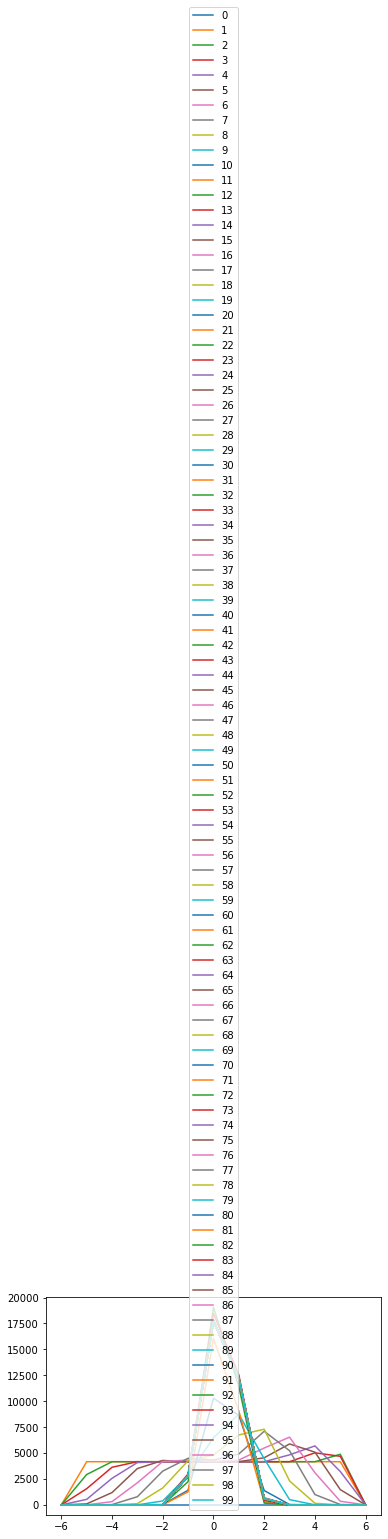

In [143]:
for t, a_line in enumerate(a):
    plt.plot(list(range(-k,l+1)), a_line, label=t)

plt.legend()
plt.show()

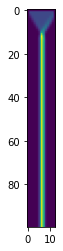

In [144]:
plt.imshow(a)

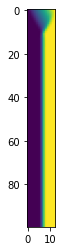

In [145]:
plt.imshow(m)